In [28]:
import numpy as np
import matplotlib.pyplot as plt
from functools import singledispatch

# Fuzzy論理

In [48]:
class Fuzzy:
    def __init__(self, name, array):
        self._name = name
        self._array = array
        self._origin = 1 # fuzzy集合の最小添え字
        
    @property # デコレータ 変数のように参照できる
    def name(self):
        return self._name
    
    @property
    def array(self):
        return self._array

    @property
    def origin(self):
        return self._origin
    
    def __len__(self):
        return len(self._array)
    
    def __add__(self,fz): # OR
        return np.maximum(self._array,fz.array)
    
    def __mul__(self,fz): # AND
        return np.minimum(self._array,fz.array)
    
    def __invert__(self): # NOT
        return 1-self._array
    
@singledispatch
def plot(fuzzy:Fuzzy, linestyle, color="gray", isscatter=True):
        x = np.linspace(fuzzy.origin,len(fuzzy),len(fuzzy)+1-fuzzy.origin)
        plt.plot(x,fuzzy.array,linestyle=linestyle,label=fuzzy.name,color=color)
        if isscatter:
            plt.scatter(x,fuzzy.array,color="black")
        
@plot.register
def _(fuzzy_np:np.ndarray, label, linestyle, color="gray", isscatter=True):
        tmp_fuzzy = Fuzzy(label,fuzzy_np)
        plot(tmp_fuzzy,linestyle,color,isscatter)

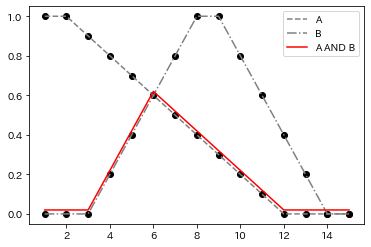

In [51]:
# Fuzzy集合を定義
A=np.array([1,1,.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0,0,0,0])
B=np.array([0,0,0,0.2,0.4,0.6,0.8,1.0,1.0,0.8,0.6,0.4,0.2,0,0])
C=np.array([0,0,0,0,0,0,0,0,0,0.2,0.4,0.6,0.8,1.0,1.0])

fuzzy_A = Fuzzy("A",A)
fuzzy_B = Fuzzy("B",B)
fuzzy_C = Fuzzy("B",B)

plt.figure(facecolor="white")
plot(fuzzy_A,"dashed")
plot(fuzzy_B,"dashdot")
plot((fuzzy_A*fuzzy_B)+0.02,"A AND B","solid","red",False)
plt.legend()
plt.show()

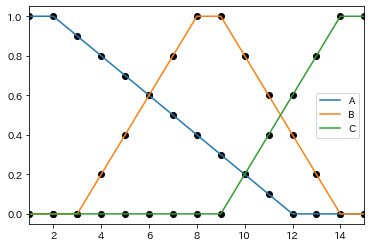

((15,), (15,), (15,))

In [8]:
xscale = np.linspace(1,15,15)
# Fuzzy集合を定義
A=np.array([1,1,.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0,0,0,0])
B=np.array([0,0,0,0.2,0.4,0.6,0.8,1.0,1.0,0.8,0.6,0.4,0.2,0,0])
C=np.array([0,0,0,0,0,0,0,0,0,0.2,0.4,0.6,0.8,1.0,1.0])

plt.figure(facecolor="white")
plt.plot(xscale,A,label="A")
plt.scatter(xscale,A,color="black")
plt.plot(xscale,B,label="B")
plt.scatter(xscale,B,color="black")
plt.plot(xscale,C,label="C")
plt.scatter(xscale,C,color="black")
plt.legend()
plt.xlim(1,15)
plt.show()
A.shape, B.shape, C.shape

In [11]:
# A OR B
B_OR_C = np.maximum(C,B)
# A AND B
A_AND_B = np.minimum(A,B)
# B BAR
B_BAR = 1-B

# A AND B AND C
A_AND_B_AND_C = np.minimum(A_AND_B,C)

In [12]:
Z = B_OR_C

for i,z in enumerate(Z):
    print(str(z)+"/"+str(i+1))

0.0/1
0.0/2
0.0/3
0.2/4
0.4/5
0.6/6
0.8/7
1.0/8
1.0/9
0.8/10
0.6/11
0.6/12
0.8/13
1.0/14
1.0/15
